In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv(r'C:\Users\91638\Downloads\test.csv')


In [3]:
data.head()


,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km�),Density (P/Km�)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0


In [4]:
# Drop rows with missing values in 'text' or 'sentiment'
data = data.dropna(subset=['text', 'sentiment'])

# Convert sentiment labels to numerical values
data['sentiment'] = data['sentiment'].apply(lambda x: 1 if x == 'positive' else (0 if x == 'negative' else -1))



In [5]:
X = data['text']  # Features
y = data['sentiment']  # Target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Convert text into numerical vectors
vectorizer = CountVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [6]:
# Initialize the Naive Bayes model
model = MultinomialNB()

# Train the model
model.fit(X_train_vec, y_train)


MultinomialNB()

In [7]:
# Predict the sentiments for test data
y_pred = model.predict(X_test_vec)


In [8]:
# Accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

# Classification Report
class_report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{class_report}")


Accuracy: 0.6098020735155514
Confusion Matrix:
[[257  61 105]
 [118 153  35]
 [ 77  18 237]]
Classification Report:
              precision    recall  f1-score   support

          -1       0.57      0.61      0.59       423
           0       0.66      0.50      0.57       306
           1       0.63      0.71      0.67       332

    accuracy                           0.61      1061
   macro avg       0.62      0.61      0.61      1061
weighted avg       0.61      0.61      0.61      1061



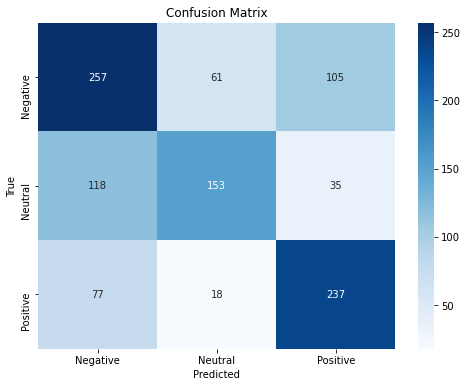

In [9]:
# Visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [11]:
# 1. Import necessary libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 2. Apply TF-IDF Vectorization to the dataset (training and test)
tfidf_vectorizer = TfidfVectorizer(stop_words='english')  # Initialize the TF-IDF vectorizer

# Transform the text data using TF-IDF for both training and test sets
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)  # Fit on training data and transform it
X_test_tfidf = tfidf_vectorizer.transform(X_test)        # Transform the test data

# 3. Initialize and train Logistic Regression Model
log_reg_model = LogisticRegression(max_iter=1000)  # Initialize Logistic Regression with max iterations

# Train the Logistic Regression model on the TF-IDF training data
log_reg_model.fit(X_train_tfidf, y_train)

# 4. Predict on the test data using the trained model
y_pred_log_reg = log_reg_model.predict(X_test_tfidf)

# 5. Evaluate the Logistic Regression model's performance
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
class_report_log_reg = classification_report(y_test, y_pred_log_reg)

# Output the results
print(f"Logistic Regression Accuracy: {accuracy_log_reg}")
print(f"Logistic Regression Confusion Matrix:\n{conf_matrix_log_reg}")
print(f"Logistic Regression Classification Report:\n{class_report_log_reg}")



Logistic Regression Accuracy: 0.6456173421300659
Logistic Regression Confusion Matrix:
[[325  44  54]
 [141 142  23]
 [102  12 218]]
Logistic Regression Classification Report:
              precision    recall  f1-score   support

          -1       0.57      0.77      0.66       423
           0       0.72      0.46      0.56       306
           1       0.74      0.66      0.70       332

    accuracy                           0.65      1061
   macro avg       0.68      0.63      0.64      1061
weighted avg       0.67      0.65      0.64      1061



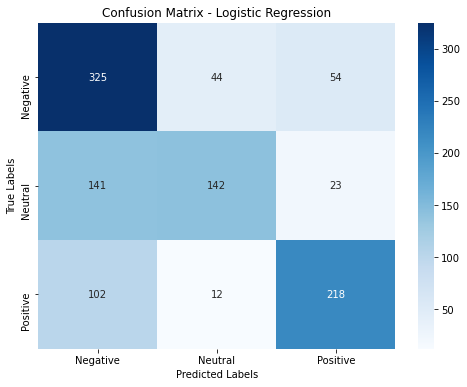

In [12]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix (using your test labels and predictions)
conf_matrix = confusion_matrix(y_test, y_pred_log_reg)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix - Logistic Regression')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()
